In [6]:
import json
import matplotlib.pyplot as plt
import matplotlib



# Load from files and pre-process data

In [9]:
compression_rates=[1,2,4,8,16,32,64]
with open('saved-results/mlp-global-magnitude-unstruct-accuracies.json', 'r') as f:
    mlp_global_magnitude_unstruct_accuracies = json.load(f)

mlp_global_magnitude_unstruct_accuracies = get_average(mlp_global_magnitude_unstruct_accuracies, accuracies=True)

with open('saved-results/mlp-global-magnitude-unstruct-pgd-success.json', 'r') as f:
    mlp_global_magnitude_unstruct_pgd_success = json.load(f)
mlp_global_magnitude_unstruct_pgd_success = get_average(mlp_global_magnitude_unstruct_pgd_success)



with open('saved-results/mlp-local-magnitude-unstruct-accuracies.json', 'r') as f:
    mlp_local_magnitude_unstruct_accuracies = json.load(f)
mlp_local_magnitude_unstruct_accuracies = get_average(mlp_local_magnitude_unstruct_accuracies, accuracies=True)

with open('saved-results/mlp-local-magnitude-unstruct-pgd-success.json', 'r') as f:
    mlp_local_magnitude_unstruct_pgd_success = json.load(f)
mlp_local_magnitude_unstruct_pgd_success = get_average(mlp_local_magnitude_unstruct_pgd_success)


with open('saved-results/mlp-local-magnitude-unstruct-accuracies.json', 'r') as f:
    mlp_local_magnitude_unstruct_accuracies = json.load(f)
mlp_local_magnitude_unstruct_accuracies = get_average(mlp_local_magnitude_unstruct_accuracies, accuracies=True)

with open('saved-results/mlp-local-magnitude-unstruct-pgd-success.json', 'r') as f:
    mlp_local_magnitude_unstruct_pgd_success = json.load(f)
mlp_local_magnitude_unstruct_pgd_success = get_average(mlp_local_magnitude_unstruct_pgd_success)


with open('saved-results/mlp-global-random-unstruct-accuracies.json', 'r') as f:
    mlp_global_random_unstruct_accuracies = json.load(f)
mlp_global_random_unstruct_accuracies = get_average(mlp_global_random_unstruct_accuracies, accuracies=True)

with open('saved-results/mlp-global-random-unstruct-pgd-success.json', 'r') as f:
    mlp_global_random_unstruct_pgd_success = json.load(f)
mlp_global_random_unstruct_pgd_success = get_average(mlp_global_random_unstruct_pgd_success)

with open('saved-results/mlp-global-random-unstruct-cw2-success.json', 'r') as f:
    mlp_global_random_unstruct_cw2_success = json.load(f)
mlp_global_random_unstruct_cw2_success = get_average(mlp_global_random_unstruct_cw2_success)


with open('saved-results/cnn-global-magnitude-unstruct-accuracies.json', 'r') as f:
    cnn_global_magnitude_unstruct_accuracies = json.load(f)
cnn_global_magnitude_unstruct_accuracies = get_average(cnn_global_magnitude_unstruct_accuracies, accuracies=True)

with open('saved-results/cnn-global-magnitude-unstruct-pgd-success.json', 'r') as f:
    cnn_global_magnitude_unstruct_pgd_success = json.load(f)
cnn_global_magnitude_unstruct_pgd_success = get_average(cnn_global_magnitude_unstruct_pgd_success)

# Helper Functions

In [3]:
def get_average(all_values, accuracies=False):
    value_per_pruning_rate=[]
    for i in range(len(all_values)):
        for j in range(len(all_values[i])):
            
            try:
                if accuracies == False:
                    value_per_pruning_rate[j].append(all_values[i][j])
                if accuracies == True:
                    value_per_pruning_rate[j].append(all_values[i][j][1])
            except:
                value_per_pruning_rate.append([])
                if accuracies == False:
                    value_per_pruning_rate[j].append(all_values[i][j])
                if accuracies == True:
                    value_per_pruning_rate[j].append(all_values[i][j][1])
                
    avg_value_per_pruning_rate = [sum(x)/len(x) for x in value_per_pruning_rate]
    
    return avg_value_per_pruning_rate


# PGD ATTACK

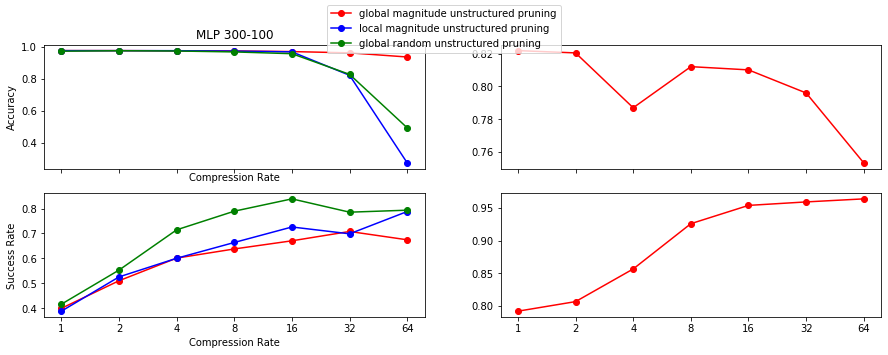

In [7]:

fig, (ax) = plt.subplots(2,2,figsize=(15,5), sharex=True)
matplotlib.rcParams['xtick.minor.size'] = 0
matplotlib.rcParams['xtick.minor.width'] = 0

ax[0,0].plot(compression_rates, mlp_global_magnitude_unstruct_accuracies,'ro-')
ax[0,0].plot(compression_rates, mlp_local_magnitude_unstruct_accuracies,'bo-')
ax[0,0].plot(compression_rates, mlp_global_random_unstruct_accuracies,'go-')
ax[0,0].set(title='MLP 300-100',ylabel='Accuracy', xlabel='Compression Rate')


l0, = ax[1,0].plot(compression_rates, mlp_global_magnitude_unstruct_pgd_success, 'ro-', label='global magnitude unstructured pruning')
l0, = ax[1,0].plot(compression_rates, mlp_local_magnitude_unstruct_pgd_success, 'bo-', label='local magnitude unstructured pruning')
l0, = ax[1,0].plot(compression_rates, mlp_global_random_unstruct_pgd_success, 'go-', label='global random unstructured pruning')
ax[1,0].set(ylabel='Success Rate', xlabel='Compression Rate')

ax[0,1].plot(compression_rates, cnn_global_magnitude_unstruct_accuracies, 'ro-')


ax[1,1].plot(compression_rates, cnn_global_magnitude_unstruct_pgd_success, 'ro-')




# format xscale
ax[1,0].set_xscale('log')
ax[1,0].set_xticks(compression_rates)

ax[1,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

handles, labels = ax[1,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.show()

# CW2 Attack

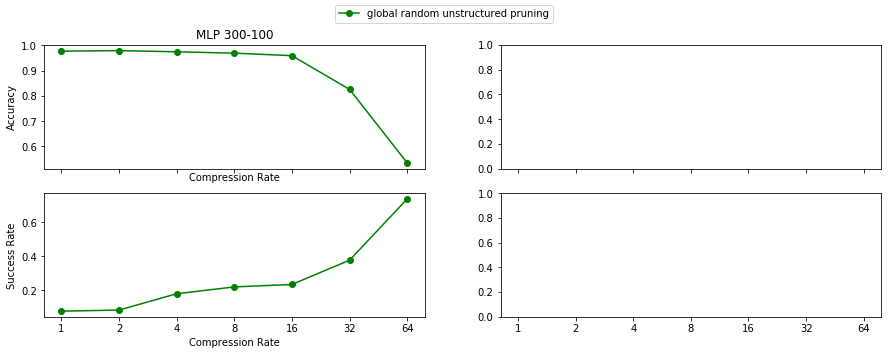

In [10]:

fig, (ax) = plt.subplots(2,2,figsize=(15,5), sharex=True)
matplotlib.rcParams['xtick.minor.size'] = 0
matplotlib.rcParams['xtick.minor.width'] = 0


ax[0,0].plot(compression_rates, mlp_global_random_unstruct_accuracies,'go-')
ax[0,0].set(title='MLP 300-100',ylabel='Accuracy', xlabel='Compression Rate')



l0, = ax[1,0].plot(compression_rates, mlp_global_random_unstruct_cw2_success, 'go-', label='global random unstructured pruning')
ax[1,0].set(ylabel='Success Rate', xlabel='Compression Rate')




# format xscale
ax[1,0].set_xscale('log')
ax[1,0].set_xticks(compression_rates)

ax[1,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

handles, labels = ax[1,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.show()